# **Outserved Analytics**
This notebook visualizes data gathered for Outserved. 

By Brock Freeman and Brendan Blacklock 

# **Overview**
* Understanding the Data
* Data Cleaning
* Data Models

In [122]:
# Import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

%matplotlib inline

# Understanding the Data
* Read cleanedGeofenceLog.csv into Dataframe and Clean Up Unwanted Columns

In [95]:
# Read CSV into DataFrame
user_file_path = 'cleanedGeofenceLog.csv'
user_data = pd.read_csv(user_file_path)

In [96]:
# Drop unwanted columns
user_data = user_data.drop(columns=["Unnamed: 0", "|"])
user_data

# Define Target (X, y)
X = user_data.drop(columns=["duration"])
y = user_data["duration"]

* Preview First Few Rows for User and Geofence Data

In [97]:
user_data.head()

,objectId,|_____type,|__iso,createdAt,updatedAt,duration
0,DdrIqhearL,Date,2019-07-19T06:31:26.473Z,2019-07-19T06:31:26.481Z,2021-04-29T23:18:02.582Z,13.0
1,fPtuD03PHN,Date,2019-07-19T06:31:35.319Z,2019-07-19T06:31:35.322Z,2021-04-29T23:18:02.582Z,4.0
2,DdhUfCgPql,Date,2019-07-19T12:38:49.807Z,2019-07-19T12:38:49.819Z,2021-04-29T23:18:02.582Z,5.0
3,tWuABtXsXP,Date,2019-07-19T12:46:49.838Z,2019-07-19T12:46:49.842Z,2021-04-29T23:18:02.582Z,27.0
4,Y0Xhk8VeA4,Date,2019-07-19T13:41:17.449Z,2019-07-19T13:41:17.451Z,2021-04-29T23:18:02.583Z,0.0


* Check for Missing Values

In [98]:
# Check Missing Data in user_data
missing_user_data = user_data.isnull().sum()
missing_user_data[0:len(missing_user_data)]

objectId      0
|_____type    0
|__iso        0
createdAt     0
updatedAt     0
duration      0
dtype: int64

No Missing Data in user_data


# User Duration

In [99]:
duration = user_data[["createdAt", "duration"]]

In [100]:
user_data["duration"].value_counts

<bound method IndexOpsMixin.value_counts of 0        13.0
1         4.0
2         5.0
3        27.0
4         0.0
         ... 
53811     1.0
53812    11.0
53813     1.0
53814     1.0
53815     6.0
Name: duration, Length: 53816, dtype: float64>

In [101]:
value_counts = duration["duration"].value_counts()
value_counts_df = pd.DataFrame(value_counts)
value_counts_df = value_counts_df.rename_axis(["count"]).reset_index()

In [102]:
value_counts_df.head()

,count,duration
0,1.0,14227
1,0.0,13304
2,2.0,5416
3,3.0,2180
4,4.0,1443


In [103]:
created_df = duration.drop(columns=["duration"])
duration_df = pd.concat([created_df, value_counts_df], axis=1, join="inner")

In [125]:
duration_df.columns = ["createdAt", "Duration (Seconds)", "Count"]
duration_df.head()

,createdAt,Duration (Seconds),Count
0,2019-07-19T06:31:26.481Z,1.0,14227
1,2019-07-19T06:31:35.322Z,0.0,13304
2,2019-07-19T12:38:49.819Z,2.0,5416
3,2019-07-19T12:46:49.842Z,3.0,2180
4,2019-07-19T13:41:17.451Z,4.0,1443


* There is a wide range of durations, let's narrow it down to how many users had a duration under 5 seconds.

In [127]:
# Find total amount of users who's duration was under 5 seconds
under_5_sec = duration_df[duration_df["Duration (Seconds)"] <= 5.0]

# Count the values for < 5
under_5_sec

,createdAt,Duration (Seconds),Count
0,2019-07-19T06:31:26.481Z,1.0,14227
1,2019-07-19T06:31:35.322Z,0.0,13304
2,2019-07-19T12:38:49.819Z,2.0,5416
3,2019-07-19T12:46:49.842Z,3.0,2180
4,2019-07-19T13:41:17.451Z,4.0,1443
5,2019-07-20T08:27:02.047Z,5.0,1180


In [137]:
under_5_sec.hvplot.bar(x='Duration (Seconds)',y="Count", color="gold",legend=True,title="Users Avg Time Inside Geofence under 5 Seconds")

:Bars   [Duration (Seconds)]   (Count)

In [130]:
# Find total amount of users who's duration was over 5 seconds
over_5_seconds = duration_df[duration_df["Duration (Seconds)"] >= 5.0]

# Count the values for > 5
columns_ = over_5_seconds["Duration (Seconds)"].value_counts()

In [135]:
# Display first few rows of the new dataframe
over_5_seconds["Duration (Seconds)"].sort_values(ascending=True).head()

5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
Name: Duration (Seconds), dtype: float64

In [136]:
over_5_seconds.hvplot.bar(x='Duration (Seconds)',y="Count", color="green",legend=True,title="Users Avg Time Inside Geofence over 5 Seconds")

:Bars   [Duration (Seconds)]   (Count)

* Now that we have some qualitative data, let's look where most users reside. 

# User Duration Distribution
__________________

In [ ]:
# Create Distribution charts for both over and under 5 second durations

[Text(0.5, 1.0, 'Users Avg Time Inside Geofence under 5 Seconds'),
 Text(0.5, 0, 'Duration (Seconds)'),
 Text(0, 0.5, 'Count')]

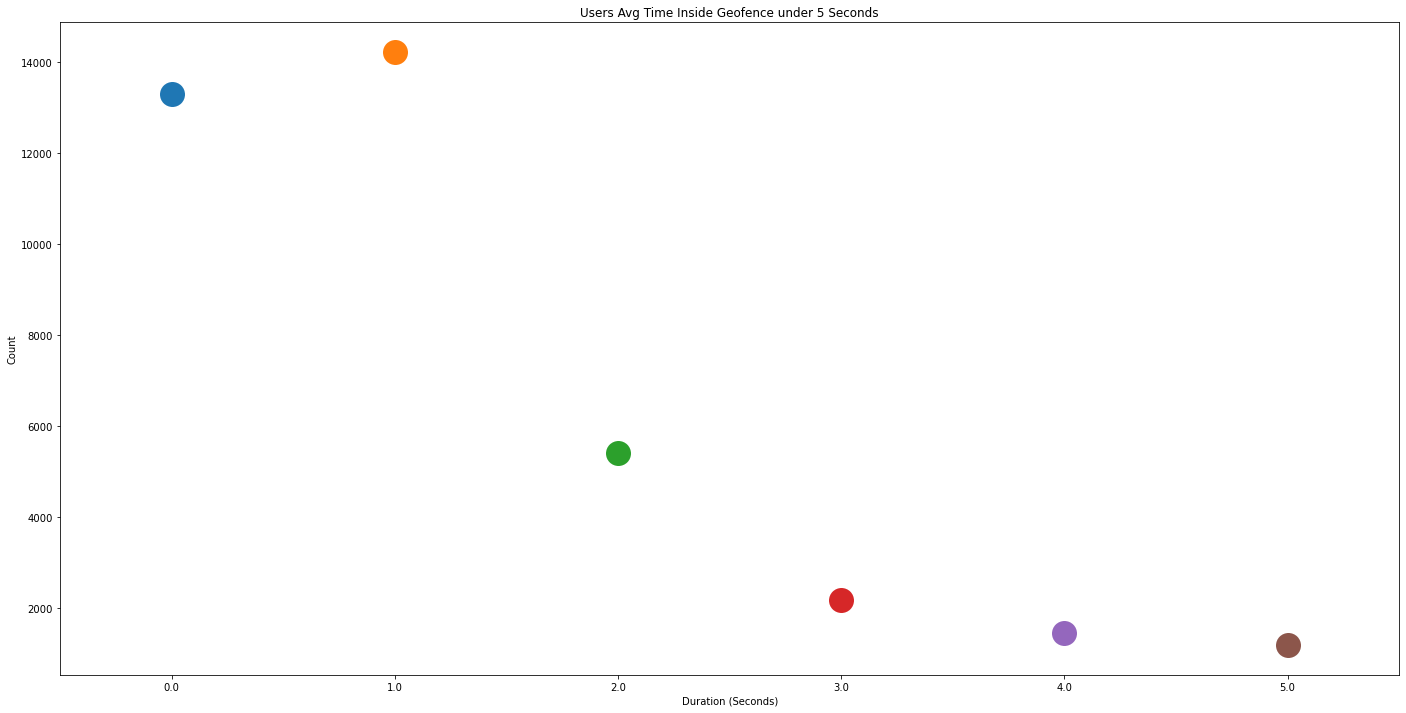

In [142]:
# Create swarmplot to show distribution
plt.figure(figsize=(24,12))
duration_distribution = sns.swarmplot(x = under_5_sec["Duration (Seconds)"], y = under_5_sec["Count"],size=25)
duration_distribution.set(title = 'Users Avg Time Inside Geofence under 5 Seconds', xlabel = 'Duration (Seconds)', ylabel = 'Count')

[Text(0.5, 1.0, 'Users Avg Time Inside Geofence over 5 Seconds'),
 Text(0.5, 0, 'Duration (Seconds)'),
 Text(0, 0.5, 'Count')]

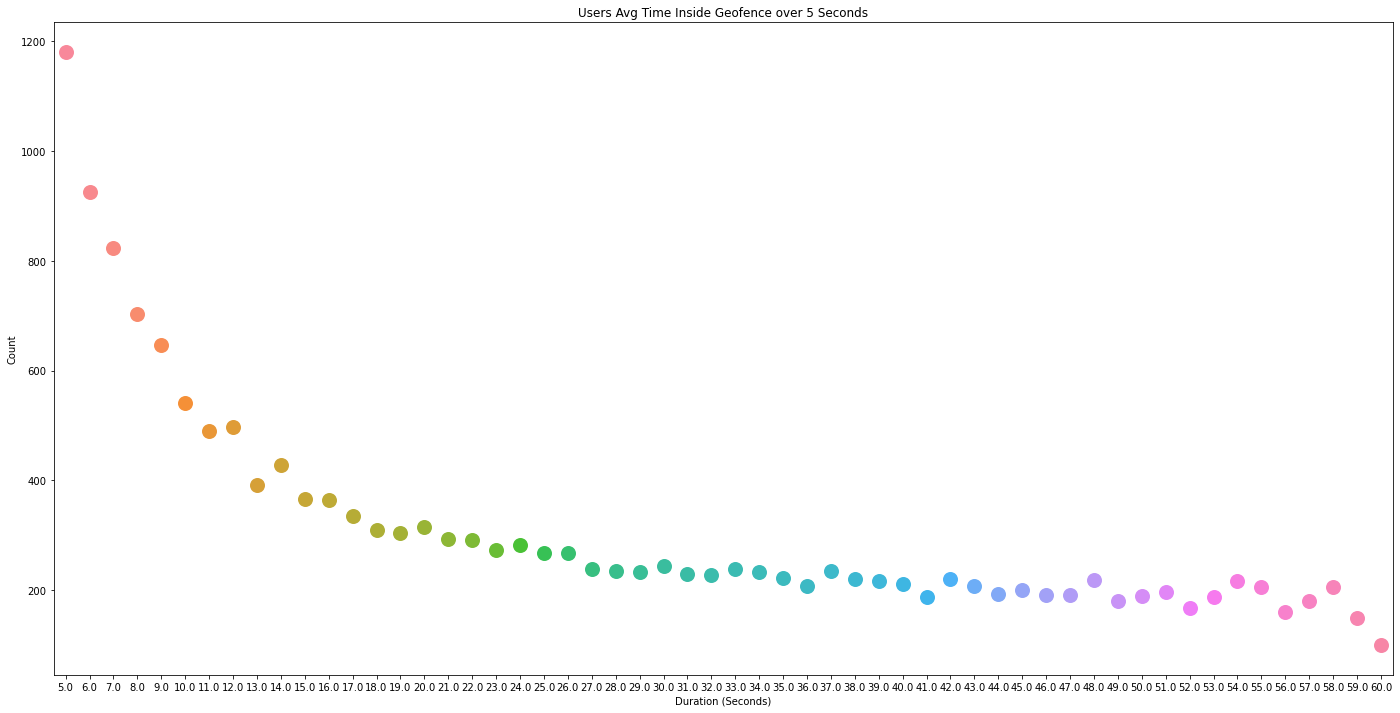

In [145]:
plt.figure(figsize=(24,12))
duration_distribution = sns.swarmplot(x = over_5_seconds["Duration (Seconds)"], y = over_5_seconds["Count"],size=15)
duration_distribution.set(title = 'Users Avg Time Inside Geofence over 5 Seconds', xlabel = 'Duration (Seconds)', ylabel = 'Count')